<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Student_Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

In [2]:
import sys
sys.path
from platform import python_version
assert sys.version_info >= (3, 5)
print(python_version())

3.7.14


In [3]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
from pylab import rcParams
import seaborn as sb

In [4]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# Load the data
def load_data():
    url = "https://raw.githubusercontent.com/romanfen/F21DL-G6/main/datasets/Maths.csv"
    return pd.read_csv(url)

students = load_data()
students_cols = list(students.columns)
print(students_cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [7]:
# Look at the data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Describe the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
# Analyze the data
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average grade mark for the class sits at around 10 or 11, perfectly average which is to be expected.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe263c597d0>,
      dtype=object)

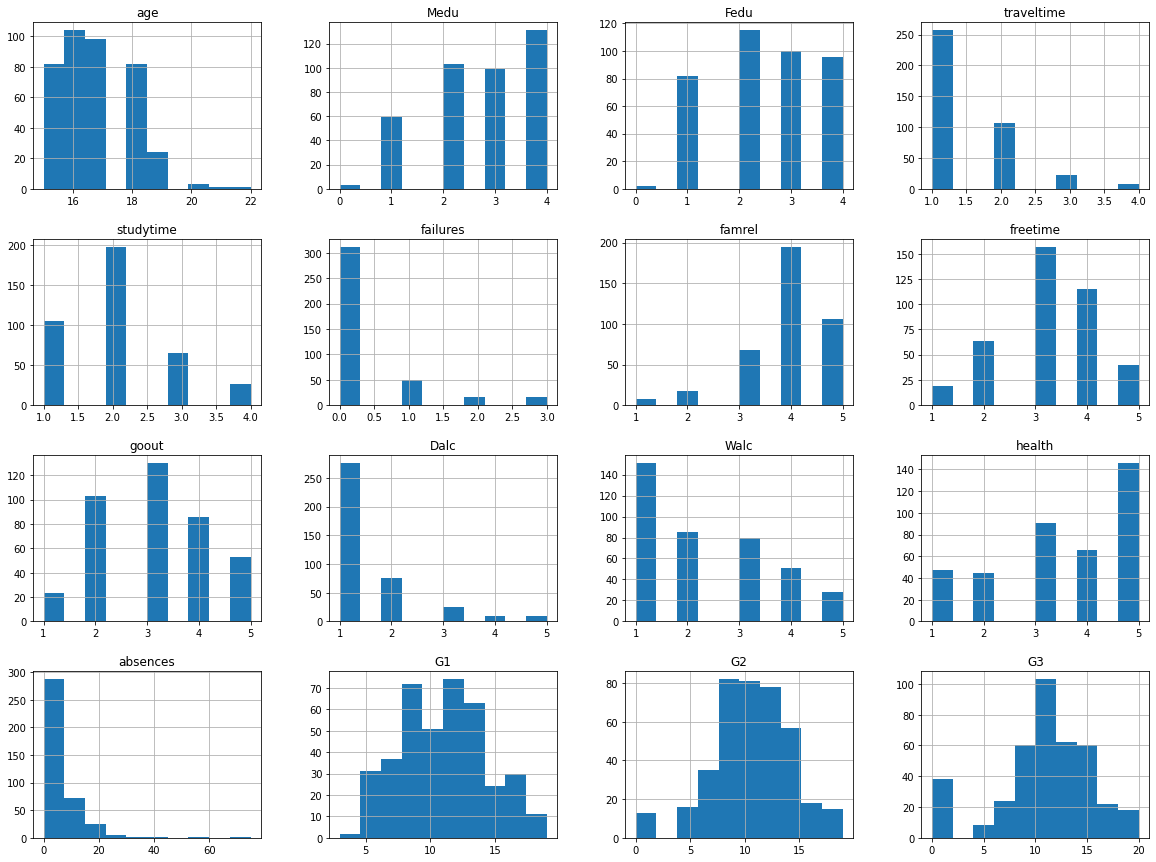

In [10]:
# Look at the data as histograms
students.hist(figsize=(20,15))

In [11]:
# Attribute correlation

corr_matrix = students.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

## Data Preparation

The begin with we bin the G3 results of students into categories of A, B, C or Fail grades.

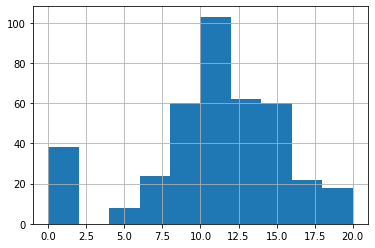

In [12]:
students['G3'].hist()

In [13]:
# Sort Grade 3 results into A,B,C and Fail Grades
# A >= 70%
# B >= 60%
# C >= 50%
# Fail < 70%

students['G3_cat'] = pd.cut(students['G3'],
                            bins=[-np.inf, 9.0, 11.0, 13.0, 20],
                            labels=['Fail', 'C', 'B', 'A'])

In [14]:
# Can also do stratified data split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(students, students["G3_cat"]):
    strat_train_set = students.loc[train_index]
    strat_test_set = students.loc[test_index]

In [15]:
students['G3_cat'].value_counts()

Fail    130
C       103
A       100
B        62
Name: G3_cat, dtype: int64

In [16]:
"""
  Fail: 130
  C: 103
  B: 62
  A: 100
"""
students['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

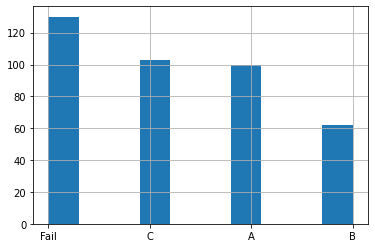

In [17]:
students['G3_cat'].hist()

In [18]:
strat_test_set["G3_cat"].value_counts() / len(strat_test_set)

Fail    0.329114
C       0.265823
A       0.253165
B       0.151899
Name: G3_cat, dtype: float64

In [19]:
students["G3_cat"].value_counts() / len(students)

Fail    0.329114
C       0.260759
A       0.253165
B       0.156962
Name: G3_cat, dtype: float64

This sections makes sure that all of the datasets have proportional classes

In [20]:
def G3_cat_proportions(students):
  return students["G3_cat"].value_counts() / len(students)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(students, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": G3_cat_proportions(students),
    "Stratified": G3_cat_proportions(strat_test_set),
    "Random": G3_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [21]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Fail,0.329114,0.329114,0.341772,3.846154,0.000000
C,0.260759,0.265823,0.202532,-22.330097,1.941748
B,0.156962,0.151899,0.126582,-19.354839,-3.225806
A,0.253165,0.253165,0.329114,30.000000,0.000000


In [22]:
students = strat_train_set.drop('G3_cat', axis=1)
students_labels = strat_train_set['G3_cat'].copy()

students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
107,GP,M,16,U,GT3,T,3,3,services,other,...,5,3,3,1,1,5,2,16,18,18
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
121,GP,M,15,U,GT3,T,2,2,services,services,...,5,5,4,1,2,5,6,16,14,15
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
112,GP,F,16,U,GT3,T,2,2,at_home,other,...,3,1,2,1,1,5,6,10,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,GP,F,16,U,LE3,A,3,3,other,services,...,2,3,5,1,4,3,12,11,12,11
278,GP,F,18,U,GT3,T,4,4,health,health,...,2,4,4,1,1,4,15,9,8,8
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,2,11,15,15
126,GP,F,15,U,LE3,A,3,4,other,other,...,5,3,2,1,1,1,0,7,10,11


Specificying the non-numerical fields so that they can be accounted for in the pipeline

In [23]:
cat_attributes = ["school","sex","address",
                  "famsize","Pstatus","Mjob",
                  "Fjob","reason","guardian",
                  "schoolsup","famsup","paid",
                  "activities","nursery","higher",
                  "internet","romantic","G3_cat"]
students_num = strat_train_set.drop(cat_attributes, axis=1)
cat_attributes = cat_attributes[:-1]  # remove the G3_cat variable to avoid errors in the pipeline

In [24]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('MnMx_scaler', MinMaxScaler()),
])

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Combines the numerical pipeline with the encoding required for non-numeric values
num_attr = list(students_num)
type(num_attr)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),#  Apply the numerical transformation to the all numeric columns
        ("cat", OneHotEncoder(), cat_attributes), # Apply the One Hot Encoding to the all categorical columns
    ])

students_prepared = full_pipeline.fit_transform(students)
#prepared_train_set = full_pipeline.fit_transform(train_set)
#prepared_test_set = full_pipeline.fit_transform(test_set)

In [54]:
students_prepared

array([[0.14285714, 0.75      , 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.42857143, 0.75      , 0.75      , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.5       , 0.5       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.14285714, 1.        , 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.75      , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ]])

## Regression Models

These Models will test for G3 exact grades

**Linear Regression Model**


In [28]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(students_prepared, students_labels)

ValueError: ignored

**Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error

grade_predictions = lin_reg.predict(students_prepared)
lin_mse = mean_squared_error(students_labels, grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(students_prepared, students_labels)

In [ ]:
grade_predictions = tree_reg.predict(students_prepared)
tree_mse = mean_squared_error(students_labels, grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

**Evaluation Using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, students_prepared, students_labels,
                         scoring="neg_mean_squared_error", cv=10)   # 10 folds are tested
tree_rmse_scores = np.sqrt(-tree_scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, students_prepared, students_labels,
                             scoring="neg_mean_squared_error", cv=10) # 10 folds are tested
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

## Classification Models

***Predicting a grade the student will get from A,B,C or Fail***

In [55]:
students_grade_A = (train_set['G3_cat'] == 'A')

students_grade_A

181    False
194     True
173    False
63     False
253    False
       ...  
71     False
106    False
270    False
348     True
102     True
Name: G3_cat, Length: 316, dtype: bool

Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(students_prepared, students_grade_A)

SGDClassifier(random_state=42)

In [57]:
# Our classifier was set to predict whether a student would recieve an A grade on their final exam of the year
sgd_clf.predict(students_prepared)

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,

## Bayesian Learning and Bayes Nets

Imports

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

Multinomial

In [33]:
# For this to work, needed the change the scaler used in the pipeline: Standard -> MinMax
multiNBModel = MultinomialNB()
multiNBModel.fit(students_prepared, students_grade_A)

multiNBModel.predict(students_prepared)

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

Gaussian

In [34]:
gausNBModel = GaussianNB()
gausNBModel.fit(students_prepared, students_grade_A)

gausNBModel.predict(students_prepared)

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,

Complement

In [35]:
compNBModel = ComplementNB()
compNBModel.fit(students_prepared, students_grade_A)

compNBModel.predict(students_prepared)

array([ True,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,

Bernoulli

In [36]:
bernNBModel = BernoulliNB()
bernNBModel.fit(students_prepared, students_grade_A)

bernNBModel.predict(students_prepared)

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,

Categorical

In [59]:
catNB = CategoricalNB()
catNB.fit(students_prepared, students_grade_A)

catNB.predict(students_prepared)

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

## Evaluation and Testing

Accuracy Tests

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [67]:
def testModel(model, test_data, predict):
  train_pred = cross_val_predict(model, test_data, predict, cv=10)
  cM = confusion_matrix(predict, train_pred)
  TPos, FPos, TNeg, FNeg = cM[0][0] , cM[0][1] , cM[1][0] , cM[1][1]
  print("Accuracy :" , np.mean(cross_val_score(model, test_data, predict, cv=10, scoring="accuracy")))
  print("Confusion Matrix: " , cM)
  print("True Positives: " , TPos)
  print("False Positives: " , FPos)
  print("False Negatives: " , FNeg)
  print("True Negatives: " , TNeg)
  print("Sensitivity: " , cM[0][0] / (cM[0][0]+cM[1][0]))
  print("Specificity: " , cM[1][1] / (cM[1][1]+cM[0][1]))
  print("Precision: ", precision_score(predict, train_pred))
  print("Recall: " , recall_score(predict, train_pred))
  print("F1 Score: " , f1_score(predict, train_pred))
  print("ROC Area: " , roc_auc_score(predict, train_pred))

testModel(catNB, students_prepared, students_grade_A[0:316])

IndexError: ignored

Naive Bayes Algorithm  | Accuracy | TP | FP | FN | TN | Sensitivity |Specificity | Precision | Recall | F1 Score | ROC Area
-----------|-------|---|--|--|--|-------|-------|-------|-------|-------|------
Mutlinomial|0.75615|230|12|9 |6 |0.77966|0.42857|0.42857|0.12162|0.18947|0.53602
Gaussia    |0.60736|172|70|20|54|0.76106|0.22222|0.22222|0.27027|0.24390|0.4905
Complement |0.59143|160|82|27|47|0.77295|0.24771|0.24771|0.36486|0.29508|0.51301
Bernoulli  |0.72762|215|27|15|59|0.78467|0.35714|0.35714|0.20270|0.25862|0.54557
Categorical|       |   |  |  |  |       |       |       |       |       |
Complex    |       |   |  |  |  |       |       |       |       |       |

In [ ]:
def ROC_Curve(model, data, predict):
  train_pred = cross_val_predict(model, test_data, predict, cv=3)
  fpr, tpr, thresholds = roc_curve(predict, train_pred)
  plt.figure(figsize=(8, 6))                         # Not shown
  plot_roc_curve(fpr, tpr)
  plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
  plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
  plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
  plt.show()